# Split Cycle

This notebook contains examples from the paper "[Split Cycle: A New Condorcet Consistent Voting Method Independent of Clones and Immune to Spoilers](https://arxiv.org/abs/2004.02350)" by Wesley H. Holliday and Eric Pacuit.  


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from itertools import product, combinations
import matplotlib.pyplot as plt
import networkx as nx
from IPython.display import display, Math

from voting.profiles import *
from voting.generate_profiles import *
from voting.voting_methods import *

# Notation

Refer to our paper for more details about the terminology and notation. 

Fix infinite sets $\mathcal{V}$ and $\mathcal{X}$ of *voters* and *candidates*, respectively. For $X\subseteq\mathcal{X}$, let $\mathcal{L}(X)$ be the set of all linear orders on $X$.

A **profile** is a function $\mathbf{P}: V(\mathbf{P})\to \mathcal{L}(X(\mathbf{P}))$ for some nonempty finite $V(\mathbf{P})\subseteq \mathcal{V}$ and nonempty finite $X(\mathbf{P})\subseteq \mathcal{X}$. We call $V(\mathbf{P})$ and $X(\mathbf{P})$ the sets of *voters in $\mathbf{P}$* and *candidates in $\mathbf{P}$*, respectively. We call $\mathbf{P}(i)$ voter $i$'s *ballot*, and we write '$x\mathbf{P}_iy$' for $(x,y)\in\mathbf{P}(i)$.

A **margin graph**  is a weighted directed graph such that the edge relation of the graph is asymmetric and either all weights of edges are even positive integers or all weights of edges are odd positive integers.

Let $\mathbf{P}$ be a profile and $a,b\in X(\mathbf{P})$. Then $Margin_\mathbf{P}(a,b)=|\{i\in V(\mathbf{P})\mid a\mathbf{P}_ib\}|-|\{i\in V(\mathbf{P})\mid b\mathbf{P}_ia\}|$.  The *margin graph of $\mathbf{P}$*, $\mathcal{M}(\mathbf{P})$, is the weighted directed graph whose set of vertices is $X(\mathbf{P})$ with an edge from $a$ to $b$ weighted by $Margin(a,b)$ when $Margin(a,b)>0$, in which case we say that *$a$ is majority preferred to $b$*. We write $a\overset{\alpha}{\to}_\mathbf{P}b\mbox{ if }\alpha = Margin_\mathbf{P}(a,b)> 0.$   


In [3]:

# define some variables to simplify notation 
a = 0
b = 1
c = 2
d = 3
e = 4
f = 5

# candidate names are integers
cand_names_3 = [a, b, c]
cand_names_4 = [a, b, c, d]
cand_names_5 = [a, b, c, d, e]
cand_names_5 = [a, b, c, d, e, f]

# map candidate names to letters to match the notation in our papaer
cmap_abc    = {a:"a", b:"b", c:"c"}
cmap_abcd   = {a:"a", b:"b", c:"c", d:"d"}
cmap_abcde  = {a:"a", b:"b", c:"c", d:"d", e:"e"}
cmap_abcdef = {a:"a", b:"b", c:"c", d:"d", e:"e", f:"f"}


+---+---+---+
| 2 | 3 | 4 |
+---+---+---+
| b | a | c |
| a | c | b |
| c | b | a |
+---+---+---+


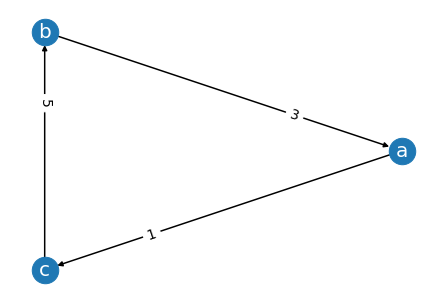

There is an edge from b to a since 6 voters rank b above a and 3 voters rank a above b. So, Margin(b, a) = 3


In [4]:
# Example from Section 1.1, pg. 6

# candidate names
cand_names = cand_names_3

#candidate name map
cmap = cmap_abc

num_cands = 3

prof = Profile(
    [
        (b, a, c),
        (a, c, b),
        (c, b, a)
    ], 
    num_cands, 
    rcounts = [2, 3, 4], 
    cmap = cmap)


# display the profile
prof.display()

# display the margin graph
prof.display_margin_graph()

print(f"There is an edge from {cmap[b]} to {cmap[a]} since \
{prof.support(b,a)} voters rank {cmap[b]} above {cmap[a]} and {prof.support(a,b)} voters rank {cmap[a]} above {cmap[b]}. So, Margin({cmap[b]}, {cmap[a]}) = {prof.margin(b,a)}")    





## Voting Method

A **voting method** is a function $F$ on the domain of all profiles such that for any profile $\mathbf{P}$, $\varnothing\neq F(\mathbf{P})\subseteq X(\mathbf{P})$. We call $F(\mathbf{P})$ the set of *winners for $\mathbf{P}$ under $F$*.


### Examples from Section 1.2

In [5]:
print("\nIllustrating the strong no show paradox - Section 1.2\n\n")

# candidate names
cand_names = cand_names_3

#candidate name map
cmap = cmap_abc

num_cands = 3

# Example from pg. 6 in Section 1.2
prof1 = Profile(
    [
        (a, b, c),
        (b, c, a),
        (c, a, b),
        (c, b, a)
    ], 
    num_cands, 
    rcounts = [2, 3, 1, 3], 
    cmap = cmap)

# display the profile
prof1.display()

# Winners for hare - also called ranked choice voting, see Appendix C.6
display_winners(prof1, hare) # display_winners is found in voting/voting_methods.py

print(f"\n\nTwo voters are added with the ranking ({cmap[a]},{cmap[b]},{cmap[c]})\n")
# Example from pg. 6 in Section 1.2
prof2 = Profile(
    [
        (a, b, c),
        (b, c, a),
        (c, a, b),
        (c, b, a)
    ], 
    num_cands, 
    rcounts = [4, 3, 1, 3], 
    cmap = cmap)


# display the profile
prof2.display()

# Winners for hare - also called ranked choice voting, see Appendix C.6
display_winners(prof2, hare)



Illustrating the strong no show paradox - Section 1.2


+---+---+---+---+
| 2 | 3 | 1 | 3 |
+---+---+---+---+
| a | b | c | c |
| b | c | a | b |
| c | a | b | a |
+---+---+---+---+
Instant Runoff winner: b


Two voters are added with the ranking (a,b,c)

+---+---+---+---+
| 4 | 3 | 1 | 3 |
+---+---+---+---+
| a | b | c | c |
| b | c | a | b |
| c | a | b | a |
+---+---+---+---+
Instant Runoff winner: c


In [6]:
print("\nIllustrating failure of positive involvement - Section 1.2\n\n")

@vm_name("Sequential Elimination")
def sequential_elimination(profile, elim_order = None): 
    
    # the default elimination order is a, b, c, d, ....
    elim_order =  elim_order if elim_order is not None else sorted(profile.candidates)
    
    if profile.margin(elim_order[0], elim_order[1]) > 0: 
        winner = elim_order[0]
    elif profile.margin(elim_order[1], elim_order[0]) > 0: 
        winner = elim_order[1]
    else: 
        return None # need to implement a tiebreaker
    
    for c in elim_order[2::]: 
        if profile.margin(c, winner) > 0: 
            winner = c
        elif profile.margin(winner, c) > 0: 
            continue
        else: 
            return None # need to implement a tiebreaker
    return sorted([winner])

# candidate names
cand_names = cand_names_3

#candidate name map
cmap = cmap_abc

num_cands = 3

# Example from pg. 6 in Section 1.2
prof1 = Profile(
    [
        (a, b, c),
        (b, c, a),
        (c, a, b)
    ], 
    num_cands, 
    rcounts = [2, 2, 1], 
    cmap = cmap)

# display the profile
prof1.display()


# Winners for hare - also called ranked choice voting, see Appendix C.6
display_winners(prof1, sequential_elimination)

print(f"\n\nTwo voters are added with the ranking ({cmap[c]},{cmap[b]},{cmap[a]})\n")
# Example from pg. 6 in Section 1.2
prof2 = Profile(
    [
        (a, b, c),
        (b, c, a),
        (c, a, b),
        (c, b, a)
    ], 
    num_cands, 
    rcounts = [2, 2, 1, 2], 
    cmap = cmap)


# display the profile
prof2.display()

# Winners for hare - also called ranked choice voting, see Appendix C.6
display_winners(prof2, sequential_elimination)



Illustrating failure of positive involvement - Section 1.2


+---+---+---+
| 2 | 2 | 1 |
+---+---+---+
| a | b | c |
| b | c | a |
| c | a | b |
+---+---+---+
Sequential Elimination winner: c


Two voters are added with the ranking (c,b,a)

+---+---+---+---+
| 2 | 2 | 1 | 2 |
+---+---+---+---+
| a | b | c | c |
| b | c | a | b |
| c | a | b | a |
+---+---+---+---+
Sequential Elimination winner: b


## Split Cycle

Given a margin graph $\mathcal{M}$, a **simple cycle in $\mathcal{M}$** is a sequence $\langle x_1,\dots,x_n\rangle$ of nodes from $\mathcal{M}$ such that $n>1$, and for all distinct $i,j\in \{1,\dots,n\}$, $x_i=x_j$ if and only if $i,j\in \{1,n\}$ (i.e., all nodes are distinct except $x_1=x_n$), and for all $i\in \{1,\dots,n-1\}$, we have $x_i\to x_{i+1}$, where $\to $ is the edge relation of the graph. By 'cycle' we always mean a simple cycle.

Let $\mathbf{P}$ be a profile and $\rho$ a simple cycle in $\mathcal{M}(\mathbf{P})$. The **splitting number** of $\rho$, $Split\#(\rho)$, is the smallest margin between consecutive candidates in $\rho$


Let $\mathbf{P}$ be a profile and $a,b\in X(\mathbf{P})$. Then **$a$ defeats $b$ in $\mathbf{P}$** if $Margin_\mathbf{P}(a,b)>0$ and $Margin_\mathbf{P}(a,b)>Split\#(\rho)$ for every simple cycle $\rho$ in $\mathcal{M}(\mathbf{P})$ containing $a$ and $b$. A candidate $b$ is **undefeated in $\mathbf{P}$** if there is no candidate that defeats $b$.


For any profile $\mathbf{P}$, the set of **Split Cycle winners**, $SC(\mathbf{P})$, is the set of candidates who are undefeated in $\mathbf{P}$.



In [7]:
## The following is in voting/voting_methods.py, but included here for reference. 

@vm_name("Split Cycle") 
def split_cycle(profile):
    """A *majority cycle* in a profile P is a sequence x_1,...,x_n of distinct candidates in 
    P with x_1=x_n such that for 1 <= k <= n-1,  x_k is majority preferred to x_{k+1}.
    The *strength of* a majority is the minimal margin in the cycle.  
    Say that a defeats b in P if the margin of a over b is positive and greater than 
    the strength of the strongest majority cycle containing a and b. The Split Cycle winners
    are the undefeated candidates.
    """
    
    candidates = profile.candidates 
    
    # create the margin graph
    mg = profile.margin_graph()
    
    # find the cycle number for each candidate
    cycle_number = {cs:0 for cs in permutations(candidates,2)}
    for cycle in nx.simple_cycles(mg): # for each cycle in the margin graph

        # get all the margins (i.e., the weights) of the edges in the cycle
        margins = list() 
        for idx,c1 in enumerate(cycle): 
            next_idx = idx + 1 if (idx + 1) < len(cycle) else 0
            c2 = cycle[next_idx]
            margins.append(mg[c1][c2]['weight'])
            
        split_number = min(margins) # the split number of the cycle is the minimal margin
        for c1,c2 in cycle_number.keys():
            c1_index = cycle.index(c1) if c1 in cycle else -1
            c2_index = cycle.index(c2) if c2 in cycle else -1

            # only need to check cycles with an edge from c1 to c2
            if (c1_index != -1 and c2_index != -1) and ((c2_index == c1_index + 1) or (c1_index == len(cycle)-1 and c2_index == 0)):
                cycle_number[(c1,c2)] = split_number if split_number > cycle_number[(c1,c2)] else cycle_number[(c1,c2)]        

    # construct the defeat relation, where a defeats b if margin(a,b) > cycle_number(a,b) (see Lemma 3.13)
    defeat = nx.DiGraph()
    defeat.add_nodes_from(candidates)
    defeat.add_edges_from([(c1,c2)  
           for c1 in candidates 
           for c2 in candidates if c1 != c2 if profile.margin(c1,c2) > cycle_number[(c1,c2)]])

    # the winners are candidates not defeated by any other candidate
    winners = unbeaten_candidates(defeat)
    
    return sorted(list(set(winners)))


# Return Split Cycle winners, split numbers, and defeat graph
def split_cycle_with_data(prof, cmap = None):
    """Split Cycle (with data)"""
        
    candidates = prof.candidates 
    
    # create the margin graph
    mg = prof.margin_graph() 

    # find the cycle numbers (Definition  3.12) for each candidate
    cycle_number = {cs:0 for cs in permutations(prof.candidates,2)}
    split_numbers = dict()
    for cycle in nx.simple_cycles(mg): # for each cycle in the margin graph

        # get all the margins (i.e., the weights) of the edges in the cycle
        margins = list() 
        for idx,c1 in enumerate(cycle): 
            next_idx = idx + 1 if (idx + 1) < len(cycle) else 0
            c2 = cycle[next_idx]
            margins.append(mg[c1][c2]['weight'])
            
        split_number = min(margins) # the split number of the cycle (Definition 3.2)
        
        split_numbers.update({tuple(cycle): split_number}) # record split numbers
        for c1,c2 in cycle_number.keys():
            c1_index = cycle.index(c1) if c1 in cycle else -1
            c2_index = cycle.index(c2) if c2 in cycle else -1

            # only need to check cycles with an edge from c1 to c2
            if (c1_index != -1 and c2_index != -1) and ((c2_index == c1_index + 1) or (c1_index == len(cycle)-1 and c2_index == 0)):
                cycle_number[(c1,c2)] = split_number if split_number > cycle_number[(c1,c2)] else cycle_number[(c1,c2)]        

    # construct the defeat relation, where a defeats b if margin(a,b) > cycle_number(a,b) (see Lemma 3.13)
    defeat = nx.DiGraph()
    defeat.add_nodes_from(candidates)
    defeat.add_edges_from([(c1,c2)  
           for c1 in candidates 
           for c2 in candidates if c1 != c2 if prof.margin(c1,c2) > cycle_number[(c1,c2)]])

    # the winners are candidates not defeated by any other candidate
    winners = unbeaten_candidates(defeat)
    
    cmap = cmap if cmap is not None else prof.cmap 
    winners_str =  "{" + ", ".join(sorted([str(cmap[w]) for w in winners])) + "}"
    print(f"\nSplit Cycle winner{'s are ' if len(winners) > 1 else ' is '}" + winners_str)
    
    print("\n")
    print("The defeat relation and Split Cycle winners are highlighted in blue")
    display_mg_with_sc(prof, cmap = cmap)
    print("\n")
    for cycle in split_numbers.keys():
        print("Split#({}) = {}".format(",".join([cmap[c] for c in cycle]), split_numbers[cycle]))


### Example from Section 3.1, item 1

+---+---+---+---+---+
| 5 | 4 | 4 | 2 | 2 |
+---+---+---+---+---+
| a | c | b | c | b |
| c | b | a | a | c |
| b | a | c | b | a |
+---+---+---+---+---+

Split Cycle winner is {c}


The defeat relation and Split Cycle winners are highlighted in blue


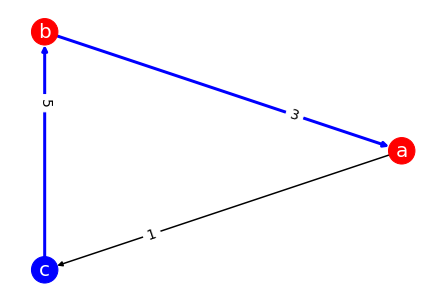



Split#(a,c,b) = 1


In [8]:
cmap = cmap_abc

num_cands = 3

# Example from pg. 6 in Section 1.2
prof = Profile([
    (a, c, b),
    (c, b, a),
    (b, a, c),
    (c, a, b),
    (b, c, a)
], 
    num_cands, 
    rcounts = [5, 4, 4, 2, 2], 
    cmap = cmap)


#display the profile
prof.display()

split_cycle_with_data(prof)


### Example from Section 3.1, item 2

+---+---+---+---+---+
| 3 | 1 | 2 | 1 | 2 |
+---+---+---+---+---+
| d | a | a | c | c |
| b | d | c | b | b |
| a | c | b | d | a |
| c | b | d | a | d |
+---+---+---+---+---+

Split Cycle winners are {a, b, c}


The defeat relation and Split Cycle winners are highlighted in blue


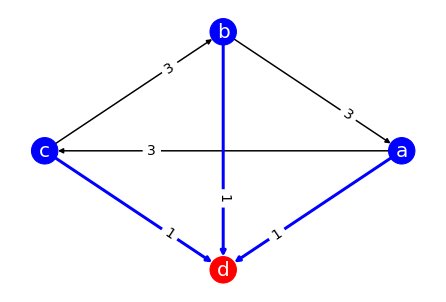



Split#(a,c,b) = 3


In [9]:
cmap = cmap_abcd

num_cands = 4

# Example from pg. 6 in Section 1.2
prof = Profile([
    (d, b, a, c),
    (a, d, c, b),
    (a, c, b, d),
    (c, b, d, a),
    (c, b, a, d) 
], 
    num_cands, 
    rcounts = [3, 1, 2, 1, 2], 
    cmap = cmap)


#display the profile
prof.display()

split_cycle_with_data(prof)


### Example from Section 3.1, item  3

+---+---+---+---+---+---+---+---+---+---+
| 2 | 2 | 2 | 2 | 2 | 2 | 2 | 2 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+
| b | e | a | d | c | f | a | e | d | f |
| a | d | c | f | b | e | f | d | a | e |
| c | f | b | e | a | d | b | c | b | c |
| e | b | d | a | f | c | c | b | c | b |
| d | a | f | c | e | b | d | a | e | d |
| f | c | e | b | d | a | e | f | f | a |
+---+---+---+---+---+---+---+---+---+---+

Split Cycle winners are {a, b, c, d, e}


The defeat relation and Split Cycle winners are highlighted in blue


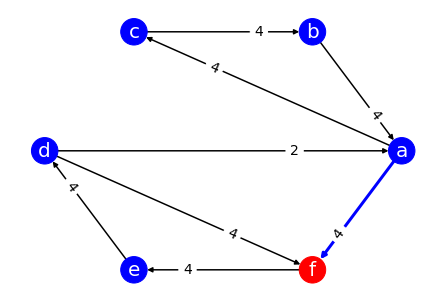



Split#(a,f,e,d) = 2
Split#(a,c,b) = 4
Split#(d,f,e) = 4


In [10]:

cmap = cmap_abcdef

num_cands = 6

# Example from pg. 6 in Section 1.2
prof = Profile([
    (b,a,c,e,d,f),
    (e,d,f,b,a,c),
    (a,c,b,d,f,e),
    (d,f,e,a,c,b),
    (c,b,a,f,e,d),
    (f,e,d,c,b,a),
    (a,f,b,c,d,e),
    (e,d,c,b,a,f),
    (d,a,b,c,e,f),
    (f,e,c,b,d,a) 
], 
    num_cands, 
    rcounts = [2, 2, 2, 2, 2, 2, 2, 2, 1, 1], 
    cmap = cmap)


#display the profile
prof.display()

split_cycle_with_data(prof)


### Example 3.8

+---+---+---+---+---+---+
| 4 | 3 | 7 | 7 | 2 | 1 |
+---+---+---+---+---+---+
| e | c | e | d | c | d |
| c | b | b | a | d | e |
| b | a | a | c | b | a |
| a | d | d | b | a | b |
| d | e | c | e | e | c |
+---+---+---+---+---+---+

Split Cycle winner is {d}


The defeat relation and Split Cycle winners are highlighted in blue


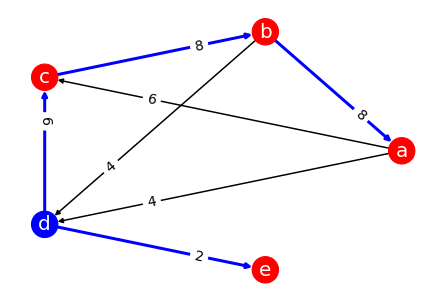



Split#(a,d,c,b) = 4
Split#(a,c,b) = 6
Split#(b,d,c) = 4


In [11]:

cmap = cmap_abcde

num_cands = 5

# Example from pg. 6 in Section 1.2
prof = Profile([
    (e, c, b, a, d),
    (c, b, a, d, e),
    (e, b, a, d, c),
    (d, a, c, b, e),
    (c, d, b, a, e),
    (d, e, a, b, c)
], 
    num_cands, 
    rcounts = [4, 3, 7, 7, 2, 1], 
    cmap = cmap)


#display the profile
prof.display()

split_cycle_with_data(prof)


## Comparison with Beat Path (Lemma 3.17)

**Lemma (3.17)**.   For any profile, the set of Beat Path winners is a subset of the set of Split Cycle winners. 

Both the [Schulze's Beat Path](https://arxiv.org/pdf/1804.02973.pdf) method  and Split Cycle can be implemented using a variation of the [Floyd-Warshall algorithm](https://www.programiz.com/dsa/floyd-warshall-algorithm).   

In [12]:
# The following code is available in voting/voting_methods.py, but included here for reference

@vm_name("Beat Path")
def beat_path_faster(profile):   
    """Implementation of Beat Path using a variation of the Floyd Warshall-Algorithm
    See https://en.wikipedia.org/wiki/Schulze_method#Implementation
    """
    
    candidates = profile.candidates
    
    mg = [[-np.inf for _ in candidates] for _ in candidates]
    for c1 in candidates:
        for c2 in candidates:
            if (profile.support(c1,c2) > profile.support(c2,c1) or c1 == c2):
                mg[c1][c2] = profile.support(c1,c2) - profile.support(c2,c1)
    strength = list(map(lambda i : list(map(lambda j : j , i)) , mg))
    for i in candidates:         
        for j in candidates: 
            if i!= j:
                for k in candidates: 
                    if i!= k and j != k:
                        strength[j][k] = max(strength[j][k], min(strength[j][i],strength[i][k]))
    winners = {i:True for i in candidates}
    for i in candidates: 
        for j in candidates:
            if i!=j:
                if strength[j][i] > strength[i][j]:
                    winners[i] = False
    return sorted([c for c in candidates if winners[c]])


@vm_name("Split Cycle")
def split_cycle_faster(profile):   
    """Implementation of Split Cycle using a variation of the Floyd Warshall-Algorithm  
    """
    candidates = profile.candidates
    weak_condorcet_winners = {c:True for c in candidates}
    mg = [[-np.inf for _ in candidates] for _ in candidates]
    
    # Weak Condorcet winners are Split Cycle winners
    for c1 in candidates:
        for c2 in candidates:
            if (profile.support(c1,c2) > profile.support(c2,c1) or c1 == c2):
                mg[c1][c2] = profile.support(c1,c2) - profile.support(c2,c1)
                weak_condorcet_winners[c2] = weak_condorcet_winners[c2] and (c1 == c2)
    
    strength = list(map(lambda i : list(map(lambda j : j , i)) , mg))
    for i in candidates:         
        for j in candidates: 
            if i!= j:
                if not weak_condorcet_winners[j]: # weak Condorcet winners are Split Cycle winners
                    for k in candidates: 
                        if i!= k and j != k:
                            strength[j][k] = max(strength[j][k], min(strength[j][i],strength[i][k]))
    winners = {i:True for i in candidates}
    for i in candidates: 
        for j in candidates:
            if i!=j:
                if mg[j][i] > strength[i][j]: # the main difference with Beat Path
                    winners[i] = False
    return sorted([c for c in candidates if winners[c]])


+---+---+---+---+
| 1 | 2 | 1 | 2 |
+---+---+---+---+
| d | c | c | b |
| b | a | d | a |
| c | d | b | d |
| a | b | a | c |
+---+---+---+---+


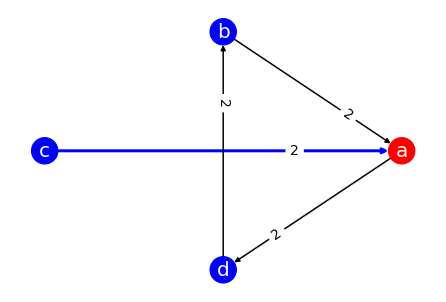



Split Cycle winners: b, c, d
Beat Path winner: c


In [13]:
# Example in which Beat Path winners are a strict subset of Split Cycle winners

#candidate name map
cmap = cmap_abcde

num_cands = 4

anon_prof = {(d, b, c, a): 1,
             (c, a, d, b): 2,
             (c, d, b, a): 1,
             (b, a, d, c): 2
            } 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)


#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

print("\n")
display_winners(prof, split_cycle_faster )
display_winners(prof, beat_path_faster)



## Immunity to Spoilers

A voting method $F$ satisfies **immunity to spoilers** if for every profile $\mathbf{P}$ and $a,b\in X(\mathbf{P})$, if $a\in F(\mathbf{P}_{-b})$ and $Margin_\mathbf{P}(a,b)> 0$ and $b\not\in F(\mathbf{P})$, then $a\in F(\mathbf{P})$.

**Proposition** Beat Path and Ranked Pairs are not immune to spoilers. 

### Beat Path is not immune to spoilers.

Profile without candidate e

+---+---+---+---+---+
| 9 | 3 | 2 | 5 | 4 |
+---+---+---+---+---+
| b | a | d | d | d |
| a | c | a | c | c |
| c | b | c | b | a |
| d | d | b | a | b |
+---+---+---+---+---+


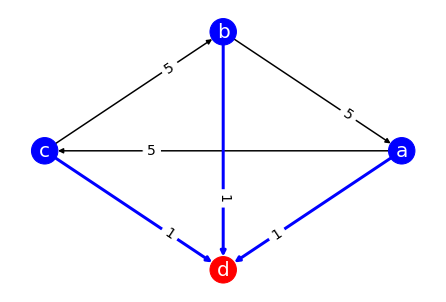



Split Cycle winners: a, b, c
Beat Path winners: a, b, c

--------

Profile with candidate e

+---+---+---+---+---+---+---+---+
| 2 | 3 | 3 | 1 | 1 | 5 | 4 | 4 |
+---+---+---+---+---+---+---+---+
| b | b | a | d | d | d | b | d |
| a | a | e | e | a | e | e | c |
| c | c | c | a | e | c | a | a |
| d | e | b | c | c | b | c | b |
| e | d | d | b | b | a | d | e |
+---+---+---+---+---+---+---+---+


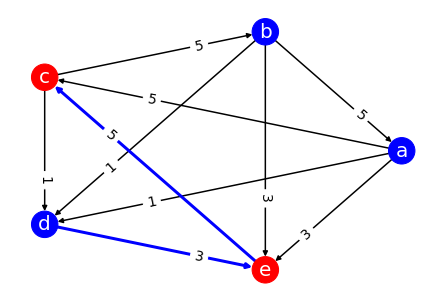



Split Cycle winners: a, b, d
Beat Path winner: d


In [14]:
# profile without candidate e
print("Profile without candidate e\n")

#candidate name map
cmap = cmap_abcd


anon_prof = {(b, a, c, d):9,
             (a, c, b, d):3,
             (d, a, c, b):2,
             (d, c, b, a):5,
             (d, c, a, b):4} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

print("\n")
display_winners(prof, split_cycle_faster)
display_winners(prof, beat_path_faster)


print("\n--------\n")

# profile with candidate e

print("Profile with candidate e\n")

#candidate name map
cmap = cmap_abcde

anon_prof = {(b, a, c, d, e):2,
             (b, a, c, e, d):3,
             (a, e, c, b, d):3,
             (d, e, a, c, b):1,
             (d, a, e, c, b):1,
             (d, e, c, b, a):5,
             (b, e, a, c, d):4,
             (d, c, a, b, e):4} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

print("\n")
display_winners(prof, split_cycle_faster)
display_winners(prof, beat_path_faster)



### Ranked Pairs is not immune to spoilers.

Profile without candidate e

+---+---+---+---+---+---+---+----+----+
| 5 | 3 | 1 | 7 | 4 | 4 | 2 | 11 | 16 |
+---+---+---+---+---+---+---+----+----+
| a | b | a | d | c | d | b | b  | c  |
| b | c | c | a | a | b | a | a  | d  |
| c | d | b | b | b | c | c | d  | a  |
| d | a | d | c | d | a | d | c  | b  |
+---+---+---+---+---+---+---+----+----+


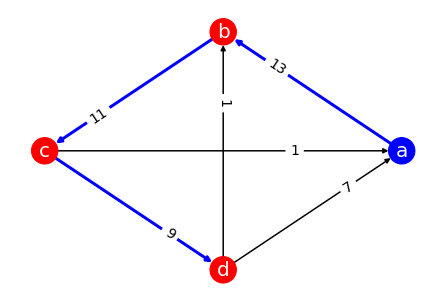



Split Cycle winner: a
Beat Path winner: a
Ranked Pairs winner: a

--------

Profile with candidate e

+---+---+---+---+---+---+---+---+---+---+----+
| 5 | 3 | 4 | 1 | 7 | 4 | 4 | 2 | 7 | 4 | 12 |
+---+---+---+---+---+---+---+---+---+---+----+
| a | b | c | e | d | c | e | e | e | b | c  |
| b | c | e | a | a | a | d | b | b | e | d  |
| c | e | d | c | b | e | b | a | a | a | a  |
| d | d | a | b | c | b | c | c | d | d | e  |
| e | a | b | d | e | d | a | d | c | c | b  |
+---+---+---+---+---+---+---+---+---+---+----+


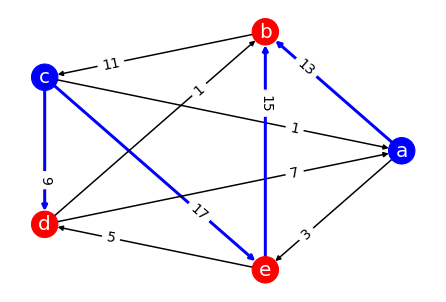



Split Cycle winners: a, c
Beat Path winner: a
Ranked Pairs winner: c


In [15]:
# profile without candidate e

print("Profile without candidate e\n")
#candidate name map
cmap = cmap_abcd

anon_prof = {(a, b, c, d):5,
             (b, c, d, a):3,
             (a, c, b, d):1,
             (d, a, b, c):7,
             (c, a, b, d):4,
             (d, b, c, a):4,
             (b, a, c, d):2,
             (b, a, d, c):11,
             (c, d, a, b):16} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

print("\n")
display_winners(prof, split_cycle_faster)
display_winners(prof, beat_path_faster)
display_winners(prof, ranked_pairs)

print("\n--------\n")

# profile with candidate e

print("Profile with candidate e\n")

#candidate name map
cmap = cmap_abcde

anon_prof = {(a, b, c, d, e):5,
             (b, c, e, d, a):3,
             (c, e, d, a, b):4,
             (e, a, c, b, d):1,
             (d, a, b, c, e):7,
             (c, a, e, b, d):4,
             (e, d, b, c, a):4,
             (e, b, a, c, d):2,
             (e, b, a, d, c):7,
             (b, e, a, d, c):4,
             (c, d, a, e, b):12} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

print("\n")
display_winners(prof, split_cycle_faster)
display_winners(prof, beat_path_faster)
display_winners(prof, ranked_pairs)



## Stability for Winners

A voting method $F$ satisfies **stability for winners** (resp. **strong stability for winners**) if for every profile $\mathbf{P}$ and $a,b\in X(\mathbf{P})$, if $a\in F(\mathbf{P}_{-b})$ and $Margin_\mathbf{P}(a,b)> 0$ (resp. $Margin_\mathbf{P}(a,b)\geq 0$), then $a\in F(\mathbf{P})$.

Profile without candidate d

+---+---+---+
| 3 | 3 | 3 |
+---+---+---+
| c | b | a |
| b | a | c |
| a | c | b |
+---+---+---+


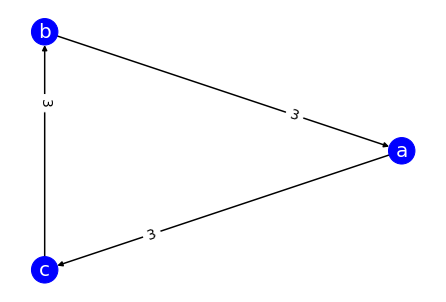



Split Cycle winners: a, b, c
Beat Path winners: a, b, c
Minimax winners: a, b, c

--------

Profile with candidate d

+---+---+---+---+
| 3 | 2 | 1 | 3 |
+---+---+---+---+
| c | b | d | d |
| b | a | b | a |
| a | d | a | c |
| d | c | c | b |
+---+---+---+---+


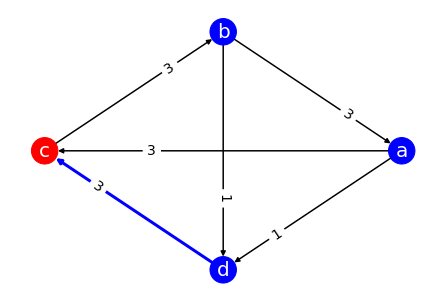



Split Cycle winners: a, b, d
Beat Path winner: d
Minimax winner: d


In [16]:
# profile without candidate d
print("Profile without candidate d\n")


#candidate name map
cmap = cmap_abc

anon_prof = {(c, b, a):3,
             (b, a, c):3,
             (a, c, b):3} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

print("\n")
display_winners(prof, split_cycle_faster)
display_winners(prof, beat_path_faster)
display_winners(prof, minimax)


# profile without candidate d

print("\n--------\n")

# profile with candidate e

print("Profile with candidate d\n")


#candidate name map
cmap = cmap_abcd

anon_prof = {(c, b, a, d):3,
             (b, a, d, c):2,
             (d, b, a, c):1,
             (d, a, c, b):3} 


rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

print("\n")
display_winners(prof, split_cycle_faster)
display_winners(prof, beat_path_faster)
display_winners(prof, minimax)




## Amalgamation

Two profiles $\mathbf{P}$ and $\mathbf{P}'$ are **almagamable** if $V(\mathbf{P})=V(\mathbf{P}')$ and for every $x,y\in X(\mathbf{P})\cap X(\mathbf{P}')$ and $i\in V(\mathbf{P})$, $x\mathbf{P}_i y$ if and only if $x\mathbf{P}'_i y$. An \textit{amalgamation of $\mathbf{P}$ and $\mathbf{P}'$} is any profile $\mathbf{Q}: V(\mathbf{P})\to \mathcal{L}(X(\mathbf{P})\cup X(\mathbf{P}'))$ such that for all $i\in V(\mathbf{P})$:

1. if $x,y\in X(\mathbf{P})$, then $x\mathbf{Q}_i y$ if and only if $x\mathbf{P}_i y$;
2. if $x,y\in X(\mathbf{P}')$, then $x\mathbf{Q}_i y$ if and only if $x\mathbf{P}'_i y$.

A voting method $F$ satisfying **amalgamation** if for any two amalgamable profiles $\mathbf{P}$ and $\mathbf{P}'$, if $a\in F(\mathbf{P})\cap F(\mathbf{P}')$, then for any amalgamation $\mathbf{Q}$ of $\mathbf{P}$ and $\mathbf{P}'$, $a\in F(\mathbf{Q})$.

Split Cycle satisfies amalgamation.

Profile 1

+---+---+---+---+
| 3 | 2 | 1 | 3 |
+---+---+---+---+
| c | b | d | d |
| b | a | b | a |
| a | d | a | c |
| d | c | c | b |
+---+---+---+---+


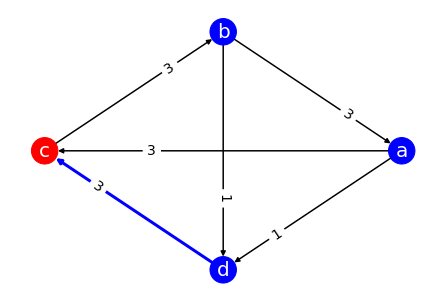



Split Cycle winners: a, b, d
Beat Path winner: d
Minimax winner: d
Ranked Pairs winners: a, b, d

Profile 2

+---+---+---+---+
| 3 | 2 | 1 | 3 |
+---+---+---+---+
| c | b | d | d |
| b | a | b | a |
| a | d | a | c |
| d | c | c | b |
+---+---+---+---+


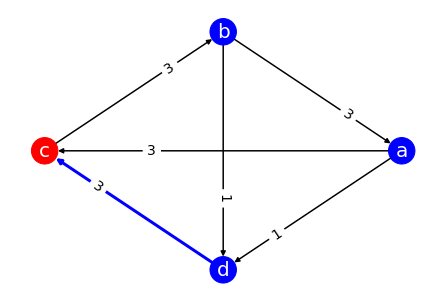



Split Cycle winners: a, b, d
Beat Path winner: d
Minimax winner: d
Ranked Pairs winners: a, b, d


In [17]:


print("Profile 1\n")
cmap1 = cmap_abcd

anon_prof1 = {(d, a, c, b):4,
             (d, c, b, a):2,
             (c, b, d, a):1,
             (c, b, a, d):1,
             (b, a, c, d):4} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof1 = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof1.display()

# display the margin graph
display_mg_with_sc(prof1)

print("\n")
display_winners(prof1, split_cycle_faster)
display_winners(prof1, beat_path_faster)
display_winners(prof1, minimax)
display_winners(prof1, ranked_pairs)


## Profile 2

print("\nProfile 2\n")

cmap2 = {b:"b", d:"d", e:"e", f:"f"}

anon_prof2 = {(d, f, e, b):4,
             (f, e, d, b):2,
             (b, f, e, d):2,
             (b, e, d, f):4} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof2 = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof1.display()

# display the margin graph
display_mg_with_sc(prof2)

print("\n")
display_winners(prof2, split_cycle)
display_winners(prof2, beat_path)
display_winners(prof2, minimax)
display_winners(prof2, ranked_pairs)



+---+---+---+---+---+---+---+
| 1 | 3 | 2 | 1 | 1 | 3 | 1 |
+---+---+---+---+---+---+---+
| d | d | f | c | c | b | b |
| f | a | e | b | b | e | a |
| a | f | d | f | a | a | e |
| c | c | c | e | f | c | c |
| e | e | b | d | e | d | d |
| b | b | a | a | d | f | f |
+---+---+---+---+---+---+---+


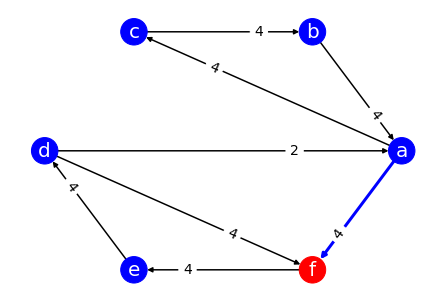



Split Cycle winners: a, b, c, d, e
Beat Path winners: a, b, c
Minimax winners: a, b, c, d, e, f


In [18]:
# Amalgamation of the two profiles


cmap = cmap_abcdef

anon_prof = {(d, f, a, c, e, b):1,
             (d, a, f, c, e, b):3,
             (f, e, d, c, b, a):2,
             (c, b, f, e, d, a):1,
             (c, b, a, f, e, d):1,
             (b, e, a, c, d, f):3,
             (b, a, e, c, d, f):1} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

print("\n")
display_winners(prof, split_cycle_faster)
display_winners(prof, beat_path_faster)
display_winners(prof, minimax)
# Uncomment to see the Ranked Pairs winners (Warning: It takes a really long time to run!)
#display_winners(prof, ranked_pairs)


## Smith and Schwartz Criteria


Let $\mathbf{P}$ be a profile and $S\subseteq X(\mathbf{P})$. Then $S$ is $\to_\mathbf{P}$**-dominant** if for all $x\in S$ and $y\in X\setminus S$, we have $x\to_\mathbf{P}y$. Define
$GETCHA(\mathbf{P})=\bigcap \{S\subseteq X\mid S$ is $\to_\mathbf{P}$-dominant$\}.$


We also call the Smith set the GETCHA set (GETCHA stands for 'generalized top-choice assumption').

A voting method $F$ satisfies the **Smith criterion** if for any profile $\mathbf{P}$, $F(\mathbf{P})\subseteq GETCHA(\mathbf{P})$.  
 




Let $\mathbf{P}$ be a profile and $S\subseteq X(\mathbf{P})$. Then $S$ is **$\to_\mathbf{P}$-undominated** if for all $x\in S$ and $y\in X\setminus S$, we have $y\not\to_\mathbf{P}x$. Define $GOCHA(\mathbf{P})=\bigcup \{S\subseteq X\mid S$ is $\to_\mathbf{P}$-undominated and no $S'\subsetneq S$ is $\to_\mathbf{P}$-undominated$\}.$


The GOCHA set ('GOCHA' stands for 'generalized optimal choice axiom') is also called the Schwartz set.

**Lemma (Schwartz 1986, Corollary 6.2.2**.   Let $\mathbf{P}$ be any profile, and let $\to_\mathbf{P}^*$ be the transitive closure of $\to_\mathbf{P}$, i.e., $a\to_\mathbf{P}^*b$ if and only if there are $x_1,\dots , x_n\in X(\mathbf{P})$ with $a=x_1$ and $b=x_n$ such that $x_1\to_\mathbf{P}\dots \to_\mathbf{P}x_n$. Then $GOCHA(\mathbf{P})=\{x\in X(\mathbf{P})\ \mid\ $ there is no $y\in X(\mathbf{P}): y\to_\mathbf{P}^*x$  and $x\not\to_\mathbf{P}^*y\}.$


A voting method $F$ satisfies the **Schwartz criterion** if for any profile $\mathbf{P}$, $F(\mathbf{P})\subseteq GOCHA(\mathbf{P})$.


Split Cycle satisfies the Smith criterion, but does not satisfy the Schwartz criterion.



+---+---+---+---+---+
| 4 | 2 | 1 | 1 | 4 |
+---+---+---+---+---+
| d | d | c | c | b |
| a | c | b | b | a |
| c | b | d | a | c |
| b | a | a | d | d |
+---+---+---+---+---+


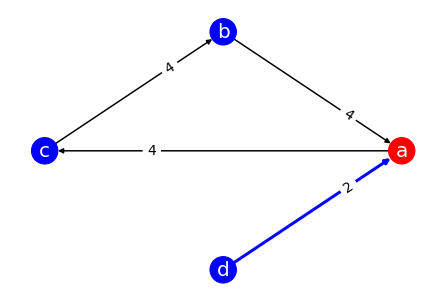

Top Cycle winners: a, b, c, d
GOCHA winner: d
Split Cycle winners: b, c, d


In [19]:
# Example illustrating that Split Cycle does not satisfy the Schwartz criteria


cmap = cmap_abcd

anon_prof = {(d, a, c, b):4,
             (d, c, b, a):2,
             (c, b, d, a):1,
             (c, b, a, d):1,
             (b, a, c, d):4} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

display_winners(prof, getcha)
display_winners(prof, gocha)
display_winners(prof, split_cycle_faster)


## Single-Voter Resolvability

A voting method $F$ satisfies **Single-Voter resolvability** if for any profile $\mathbf{P}$, if $|F(\mathbf{P})|>1$, then for any $x\in F(\mathbf{P})$, there is a profile $\mathbf{Q}$ with $V(\mathbf{P})\cap V(\mathbf{Q})=\varnothing$ and $|V(\mathbf{Q})|=1$ such that $F(\mathbf{P}+\mathbf{Q})=\{x\}$.

Split Cycle does not satisfy single-voter resolvability.


+---+---+---+---+
| 3 | 2 | 1 | 3 |
+---+---+---+---+
| c | b | d | d |
| b | a | b | a |
| a | d | a | c |
| d | c | c | b |
+---+---+---+---+


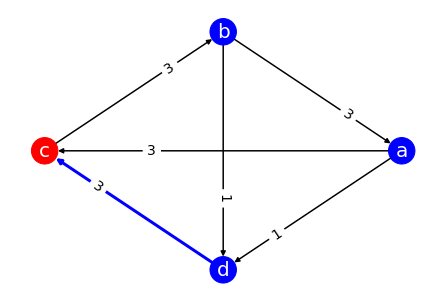



Split Cycle winners: a, b, d


In [20]:

# Example showing Split Cycle does not satisfy single-voter resolvability
cmap = cmap_abcd

anon_prof = {(c, b, a, d):3,
             (b, a, d, c):2,
             (d, b, a, c):1,
             (d, a, c, b):3} 


rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

print("\n")
display_winners(prof, split_cycle_faster)


In [21]:
winning_sets = dict()

all_rankings = permutations(prof.candidates)
for r in all_rankings:
    new_prof = Profile(
        [tuple(r) for r in prof._rankings] + [tuple(r)],
        prof.num_cands,
        list(prof._rcounts) + [1],
        cmap = prof.cmap
    )
    sc_winners = split_cycle_faster(new_prof)
    if tuple(sc_winners) in winning_sets.keys():
        winning_sets[tuple(sc_winners)] += 1
    else:
        winning_sets.update({tuple(sc_winners): 1})
        
print("The original profile: \n")
prof.display()

print()

display_winners(prof, split_cycle_faster) 

print("\nPossible winning sets by adding a single voter to the above profile: ")
for ws in winning_sets.keys():
    print("\t{} (the voter can use {} different rankings to get this outcome)".format("{" + ", ".join([cmap[_] for _ in ws]) + "}",
                                                                                    str(winning_sets[ws])))



The original profile: 

+---+---+---+---+
| 3 | 2 | 1 | 3 |
+---+---+---+---+
| c | b | d | d |
| b | a | b | a |
| a | d | a | c |
| d | c | c | b |
+---+---+---+---+

Split Cycle winners: a, b, d

Possible winning sets by adding a single voter to the above profile: 
	{a, b, d} (the voter can use 4 different rankings to get this outcome)
	{a, d} (the voter can use 6 different rankings to get this outcome)
	{b, d} (the voter can use 6 different rankings to get this outcome)
	{b, c, d} (the voter can use 2 different rankings to get this outcome)
	{a, c, d} (the voter can use 2 different rankings to get this outcome)
	{c, d} (the voter can use 2 different rankings to get this outcome)
	{d} (the voter can use 2 different rankings to get this outcome)


## Positive/Negative Involvement

$F$ satisfies **positive involvement** if for any profiles $\mathbf{P}$ and $\mathbf{P}'$ with $X(\mathbf{P})=X(\mathbf{P}')$ and $|V(\mathbf{P}')|=1$, if $x\in F(\mathbf{P})$ and for $i\in V(\mathbf{P}')$, $x \mathbf{P}_i' y$ for all $y\in X(\mathbf{P}')\setminus \{x\}$, then $x\in F(\mathbf{P}+\mathbf{P}')$.

$F$ satisfies **negative involvement** if for any profiles $\mathbf{P}$ and $\mathbf{P}'$ with $X(\mathbf{P})=X(\mathbf{P}')$ and $|V(\mathbf{P}')|=1$, if $x\not\in F(\mathbf{P})$ and for $i\in V(\mathbf{P}')$, $y \mathbf{P}_i' x$ for all $y\in X(\mathbf{P}')\setminus \{x\}$, then $x\not\in F(\mathbf{P}+\mathbf{P}')$.

Split Cycle satisfies positive and negative involvement. Beat Path does not satisfy either positive involvement or negative involvement.  

+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+
| a | e | e | d | b | d | c | b |
| c | a | d | a | e | c | e | d |
| b | d | a | b | a | b | b | c |
| d | c | c | e | c | e | d | e |
| e | b | b | c | d | a | a | a |
+---+---+---+---+---+---+---+---+


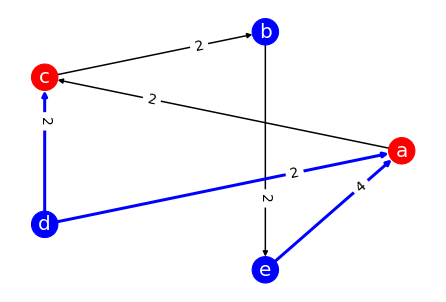



Split Cycle winners: b, d, e
Beat Path winner: d

A new profile with 1 voter with ranking a c b d e
+---+---+---+---+---+---+---+---+
| 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+
| a | e | e | d | b | d | c | b |
| c | a | d | a | e | c | e | d |
| b | d | a | b | a | b | b | c |
| d | c | c | e | c | e | d | e |
| e | b | b | c | d | a | a | a |
+---+---+---+---+---+---+---+---+


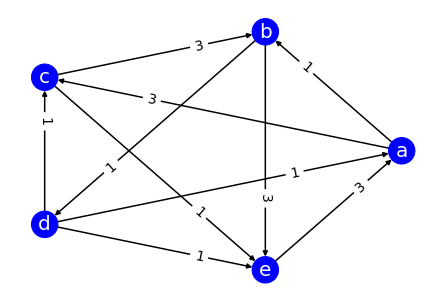



Split Cycle winners: a, b, c, d, e
Beat Path winners: a, b, c, d, e


In [22]:

cmap = cmap_abcde

anon_prof1 = {(a, c, b, d, e):1,
              (e, a, d, c, b):1,
              (e, d, a, c, b):1,
              (d, a, b, e, c):1,
              (b, e, a, c, d):1, 
              (d, c, b, e, a):1,
              (c, e, b, d, a):1,
              (b, d, c, e, a):1} 

rankings = list(anon_prof1.keys())
rcounts = [anon_prof1[r] for r in rankings]
num_cands = len(rankings[0])

prof1 = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof1.display()

# display the margin graph
display_mg_with_sc(prof1)

print("\n")
display_winners(prof1, split_cycle_faster)
display_winners(prof1, beat_path_faster)


print(f"\nA new profile with 1 voter with ranking a c b d e")
anon_prof2 = {(a, c, b, d, e):2,
              (e, a, d, c, b):1,
              (e, d, a, c, b):1,
              (d, a, b, e, c):1,
              (b, e, a, c, d):1, 
              (d, c, b, e, a):1,
              (c, e, b, d, a):1,
              (b, d, c, e, a):1} 

rankings = list(anon_prof2.keys())
rcounts = [anon_prof2[r] for r in rankings]
num_cands = len(rankings[0])

prof2 = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof2.display()

# display the margin graph
display_mg_with_sc(prof2)

print("\n")
display_winners(prof2, split_cycle_faster)
display_winners(prof2, beat_path_faster)


## GETCHA fails Pareto  (Appendix C.4)

+---+---+---+
| 1 | 1 | 1 |
+---+---+---+
| a | b | c |
| x | c | a |
| b | a | x |
| c | x | b |
+---+---+---+


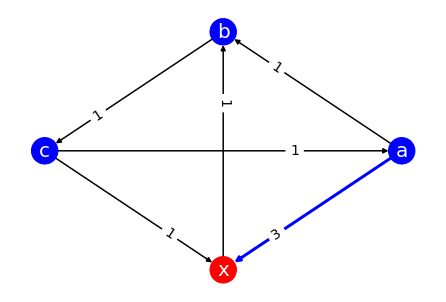

The number of voters that prefer a over x is 3
Top Cycle winners: a, b, c, x
GOCHA winners: a, b, c, x


In [23]:
# Example profile from the chapter "Weighted Tournament Solutions" by Felix Fischer, Olivier Hudry, and Rolf Niedermeier
# in the Handbook of Computational Social Choice

x=3

cmap = {a:"a", b:"b", c:"c", x:"x"}

anon_prof = {(a, x, b, c): 1,
             (b, c, a, x): 1,
             (c, a, x, b): 1} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

print("The number of voters that prefer {} over {} is {}".format(cmap[a], cmap[x], prof.support(a,x)))
display_winners(prof, getcha)
display_winners(prof, gocha)






## GOCHA fails positive involvement (Appendix C.5)

+---+---+---+
| 4 | 2 | 3 |
+---+---+---+
| y | x | z |
| x | z | y |
| z | y | x |
+---+---+---+


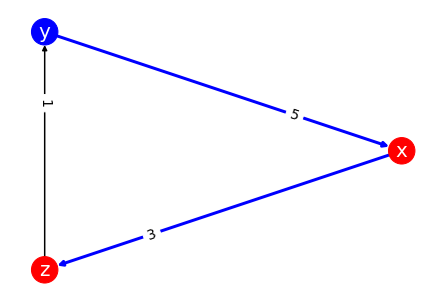

Top Cycle winners: x, y, z
GOCHA winners: x, y, z
+---+---+---+---+
| 4 | 2 | 3 | 1 |
+---+---+---+---+
| y | x | z | x |
| x | z | y | y |
| z | y | x | z |
+---+---+---+---+


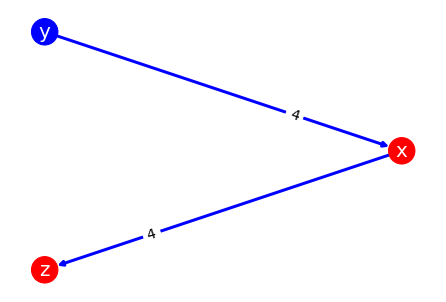

Top Cycle winners: x, y, z
GOCHA winner: y


In [24]:
x=0
y=1
z=2

cand_names = [x, y, z]
cmap = {x:"x", y:"y", z:"z"}

anon_prof1 = {(y,x,z):4,
              (x,z,y):2,
              (z,y,x):3} 

rankings = list(anon_prof1.keys())
rcounts = [anon_prof1[r] for r in rankings]
num_cands = len(rankings[0])

prof1 = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof1.display()

# display the margin graph
display_mg_with_sc(prof1)


display_winners(prof1, getcha)
display_winners(prof1, gocha)


anon_prof2 = {(y,x,z):4,
              (x,z,y):2,
              (z,y,x):3,
              (x,y,z):1} 

rankings = list(anon_prof2.keys())
rcounts = [anon_prof2[r] for r in rankings]
num_cands = len(rankings[0])

prof2 = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof2.display()

# display the margin graph
display_mg_with_sc(prof2)


display_winners(prof2, getcha)
display_winners(prof2, gocha)




## Additional  Examples (not in the paper)



+---+---+---+---+---+---+
| 3 | 3 | 4 | 4 | 1 | 1 |
+---+---+---+---+---+---+
| b | d | b | a | a | e |
| d | a | c | e | b | c |
| a | c | e | c | c | d |
| e | e | d | d | e | a |
| c | b | a | b | d | b |
+---+---+---+---+---+---+


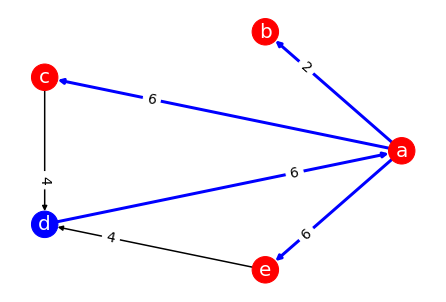

Split Cycle winner: d
Beat Path winner: d
Minimax winner: b
Top Cycle winners: a, b, c, d, e
GOCHA winners: a, c, d, e
Instant Runoff winner: a
Plurality winner: b


In [25]:
# Example profile from the chapter "Weighted Tournament Solutions" by Felix Fischer, Olivier Hudry, and Rolf Niedermeier
# in the Handbook of Computational Social Choice

cmap = cmap_abcde

anon_prof = {(b, d, a, e, c): 3,
             (d, a, c, e, b): 3,
             (b, c, e, d, a): 4,
             (a, e, c, d, b): 4,
             (a, b, c, e, d): 1,
             (e, c, d, a, b): 1} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

display_winners(prof, split_cycle_faster)
## Uncomment for Ranked Pairs winner (Warning: takes a really long time!)
#display_winners(prof, ranked_pairs)
display_winners(prof, beat_path_faster)
display_winners(prof, minimax)
display_winners(prof, getcha)
display_winners(prof, gocha)
display_winners(prof, hare)
display_winners(prof, plurality)



+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 1 | 2 | 1 | 1 |
+---+---+---+---+---+---+---+---+
| b | d | b | c | c | d | a | a |
| d | a | c | a | b | c | b | c |
| a | c | d | b | d | a | d | b |
| c | b | a | d | a | b | c | d |
+---+---+---+---+---+---+---+---+


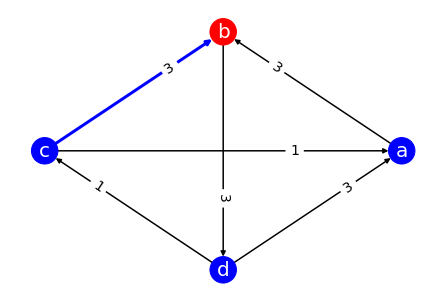

Split Cycle winners: a, c, d
Beat Path winner: c
Minimax winner: c
Top Cycle winners: a, b, c, d
GOCHA winners: a, b, c, d
Instant Runoff winner: d
Plurality winner: d


In [26]:
# Example with different Split Cycle, Beat Path and Ranked Pairs winners

cmap = cmap_abcd

anon_prof = {(b, d, a, c):1,
             (d, a, c, b):1,
             (b, c, d, a):1,
             (c, a, b, d):1,
             (c, b, d, a):1,
             (d, c, a, b):2,
             (a, b, d, c):1,
             (a, c, b, d):1} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

display_winners(prof, split_cycle_faster)
## Uncomment for Ranked Pairs winner (Warning: takes a really long time!)
#display_winners(prof, ranked_pairs)
display_winners(prof, beat_path_faster)
display_winners(prof, minimax)
display_winners(prof, getcha)
display_winners(prof, gocha)
display_winners(prof, hare)
display_winners(prof, plurality)



+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 1 | 1 | 1 | 1 | 2 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 2 | 2 | 1 | 1 | 1 |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| d | e | c | b | b | c | b | a | b | a | a | d | e | c | d | e | a |
| b | d | b | a | e | a | e | d | a | e | d | c | d | e | b | d | d |
| a | c | a | e | a | d | c | b | e | d | b | e | b | b | c | c | e |
| c | a | e | c | d | b | a | c | d | b | e | a | a | a | a | b | b |
| e | b | d | d | c | e | d | e | c | c | c | b | c | d | e | a | c |
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+


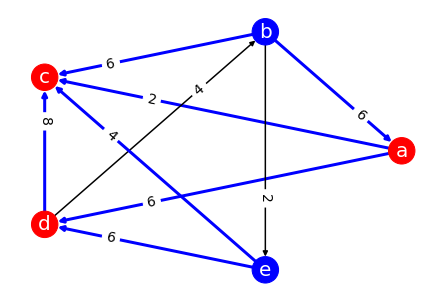

Split Cycle winners: b, e
Beat Path winner: e
Minimax winner: e
Top Cycle winners: a, b, d, e
GOCHA winners: a, b, d, e
Instant Runoff winner: b
Plurality winner: b


In [27]:
cmap = cmap_abcde

anon_prof = {(d, b, a, c, e):1,
             (e, d, c, a, b):1,
             (c, b, a, e, d):1,
             (b, a, e, c, d):1,
             (b, e, a, d, c):2,
             (c, a, d, b, e):1,
             (b, e, c, a, d):1,
             (a, d, b, c, e):1, 
             (b, a, e, d, c):1, 
             (a, e, d, b, c):1, 
             (a, e, d, b, c):1, 
             (a, d, b, e, c):1, 
             (d, c, e, a, b):1, 
             (e, d, b, a, c):2, 
             (c, e, b, a, d):2, 
             (d, b, c, a, e):1, 
             (e, d, c, b, a):1, 
             (a, d, e, b, c):1} 

rankings = list(anon_prof.keys())
rcounts = [anon_prof[r] for r in rankings]
num_cands = len(rankings[0])

prof = Profile(rankings,
               num_cands, 
               rcounts = rcounts, 
               cmap = cmap)

#display the profile
prof.display()

# display the margin graph
display_mg_with_sc(prof)

display_winners(prof, split_cycle_faster)
## Uncomment for Ranked Pairs winner (Warning: takes a really long time!)
#display_winners(prof, ranked_pairs)
display_winners(prof, beat_path_faster)
display_winners(prof, minimax)
display_winners(prof, getcha)
display_winners(prof, gocha)
display_winners(prof, hare)
display_winners(prof, plurality)

